<a href="https://colab.research.google.com/github/ecuadrafoy/PracticalMachineLearning/blob/master/WineNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2020-06-13 15:57:50--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv.1’

wines.csv.1         100%[===================>]  10.70K  --.-KB/s    in 0s      

2020-06-13 15:57:50 (75.8 MB/s) - ‘wines.csv.1’ saved [10957/10957]



In [ ]:
import pandas as pd
df = pd.read_csv('wines.csv')
display(df.head())
df.shape

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

dataset = df.values
X = dataset[:,1:14].astype(float)
y = dataset[:,0]



(178,)

In [ ]:
#Converting the labels to one hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = np_utils.to_categorical(encoded_Y)


In [ ]:
keras.backend.clear_session() #clean up prior stuff

In [ ]:
#Importing Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
#defining the baseline model
def baseline_model():
  model = Sequential()

  model.add(Dense(12,activation='relu',input_dim=13))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


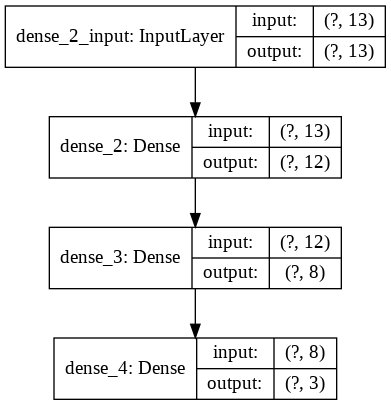

In [ ]:
keras.utils.plot_model(model, "wine_ann.png", show_shapes=True, show_layer_names=True)
#our model takes a layer of 13 inputs, converts it to to hidden layers of 12 and 8 nodes and then produces an output of 3 categories

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=16, verbose=0)


In [ ]:
h = estimator.fit(X,dummy_y, validation_split=0.33)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True)
results = cross_val_score(estimator,X,dummy_y, cv = kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 71.80% (21.98%)


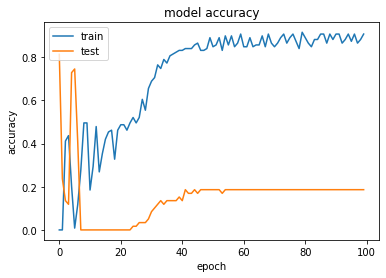

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

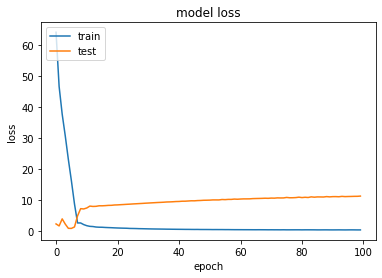

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
estimator.score(X, dummy_y)

0.6685393452644348